In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
train <- read_csv('/Users/wenjiazhai/Desktop/员工离职预测训练赛/pfm_train.csv')
test <- read_csv('/Users/wenjiazhai/Desktop/员工离职预测训练赛/pfm_test.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  BusinessTravel = col_character(),
  Department = col_character(),
  EducationField = col_character(),
  Gender = col_character(),
  JobRole = col_character(),
  MaritalStatus = col_character(),
  Over18 = col_character(),
  OverTime = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  BusinessTravel = col_character(),
  Department = col_character(),
  EducationField = col_character(),
  Gender = col_character(),
  JobRole = col_character(),
  MaritalStatus = col_character(),
  Over18 = col_character(),
  OverTime = col_character()
)

See spec(...) for full column specifications.



In [3]:
summary(train)

      Age       Attrition      BusinessTravel      Department       
 Min.   :18   Min.   :0.0000   Length:1100        Length:1100       
 1st Qu.:30   1st Qu.:0.0000   Class :character   Class :character  
 Median :36   Median :0.0000   Mode  :character   Mode  :character  
 Mean   :37   Mean   :0.1618                                        
 3rd Qu.:43   3rd Qu.:0.0000                                        
 Max.   :60   Max.   :1.0000                                        
 DistanceFromHome   Education     EducationField     EmployeeNumber  
 Min.   : 1.000   Min.   :1.000   Length:1100        Min.   :   1.0  
 1st Qu.: 2.000   1st Qu.:2.000   Class :character   1st Qu.: 504.2  
 Median : 7.000   Median :3.000   Mode  :character   Median :1026.5  
 Mean   : 9.427   Mean   :2.923                      Mean   :1028.2  
 3rd Qu.:15.000   3rd Qu.:4.000                      3rd Qu.:1556.5  
 Max.   :29.000   Max.   :5.000                      Max.   :2065.0  
 EnvironmentSatisfaction   

In [4]:
apply(select_if(train, is.character), 2, table)

$BusinessTravel

       Non-Travel Travel_Frequently     Travel_Rarely 
              108               205               787 

$Department

       Human Resources Research & Development                  Sales 
                    42                    727                    331 

$EducationField

 Human Resources    Life Sciences        Marketing          Medical 
              19              462              127              337 
           Other Technical Degree 
              63               92 

$Gender

Female   Male 
   447    653 

$JobRole

Healthcare Representative           Human Resources     Laboratory Technician 
                      100                        33                       205 
                  Manager    Manufacturing Director         Research Director 
                       80                       101                        56 
       Research Scientist           Sales Executive      Sales Representative 
                      221                      

# 'EmployeeNumber', 'StandardHours' and 'Over18' columns are useless, delete.

In [5]:
# label <- train$Attrition
train <- train %>%
    select(-'EmployeeNumber', -'StandardHours', -'Over18')#, -'Attrition')
test <- test %>%
    select(-'EmployeeNumber', -'StandardHours', -'Over18')

data <- bind_rows(train, test)

In [6]:
train_num <- train %>%
  mutate(BusinessTravel = case_when(BusinessTravel == 'Non-Travel' ~ 0,
                                    BusinessTravel == 'Travel_Frequently' ~ 1,
                                    BusinessTravel == 'Travel_Rarely' ~ 2),
         Department = case_when(Department == 'Human Resources' ~ 0,
                                Department == 'Research & Development' ~ 1,
                                Department == 'Sales' ~ 2),
         EducationField = case_when(EducationField == 'Human Resources' ~ 0,
                                    EducationField == 'Life Sciences' ~ 1,
                                    EducationField == 'Marketing' ~ 2,
                                    EducationField == 'Medical' ~ 3,
                                    EducationField == 'Other' ~ 4,
                                    EducationField == 'Technical Degree' ~ 5),
         Gender = case_when(Gender == 'Female' ~ 0,Gender == 'Male' ~ 1),
         OverTime = case_when(OverTime == 'No' ~ 0, OverTime == 'Yes' ~ 1),
         MaritalStatus = case_when(MaritalStatus == 'Divorced' ~ 0,
                                   MaritalStatus == 'Married' ~ 1,
                                   MaritalStatus == 'Single' ~ 2),
         JobRole = case_when(JobRole == 'Healthcare Representative' ~ 0,
                             JobRole == 'Human Resources' ~ 1,
                             JobRole == 'Laboratory Technician' ~ 2,
                             JobRole == 'Manager' ~ 3,
                             JobRole == 'Manufacturing Director' ~ 4,
                             JobRole == 'Research Director' ~ 5,
                             JobRole == 'Research Scientist' ~ 6,
                             JobRole == 'Sales Executive' ~7,
                             JobRole == 'Sales Representative' ~ 8))

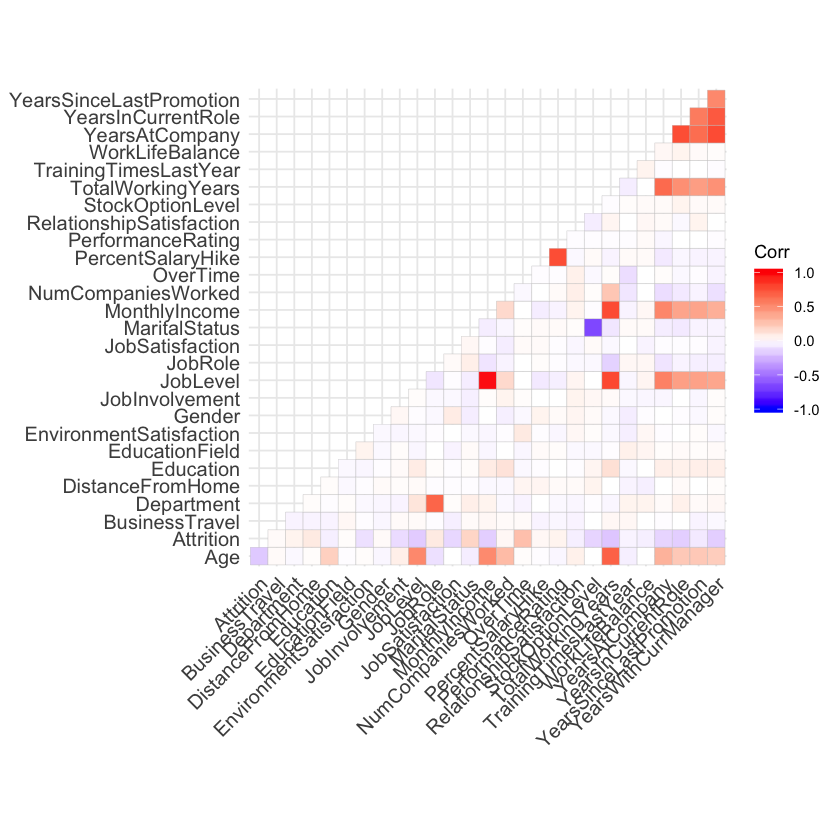

In [7]:
library(ggcorrplot)
corr <- cor(train_num)
ggcorrplot(corr, type = "lower")

In [8]:
cor_attrition <- corr[2, ]
cor_attrition[cor_attrition > 0]
cor_attrition[cor_attrition < 0]

Attrition     BusinessTravel         Department   DistanceFromHome 
       1.000000000        0.015482735        0.053363666        0.088562542 
    EducationField             Gender            JobRole      MaritalStatus 
       0.009994245        0.016749685        0.086899474        0.175638744 
NumCompaniesWorked           OverTime  PercentSalaryHike  PerformanceRating 
       0.025888756        0.267080047        0.026603693        0.046761832

Age                Education  EnvironmentSatisfaction 
             -0.17539300              -0.04649395              -0.09700347 
          JobInvolvement                 JobLevel          JobSatisfaction 
             -0.12272186              -0.16877450              -0.12556811 
           MonthlyIncome RelationshipSatisfaction         StockOptionLevel 
             -0.15552138              -0.05174889              -0.13849799 
       TotalWorkingYears    TrainingTimesLastYear          WorkLifeBalance 
             -0.18792178              -0.04339546              -0.04879380 
          YearsAtCompany       YearsInCurrentRole  YearsSinceLastPromotion 
             -0.14369731              -0.16305942              -0.07176047 
    YearsWithCurrManager 
             -0.15855759

In [9]:
TotalWorkingYears <- data.frame(unclass(table(train_num$TotalWorkingYears, train_num$Attrition)))
TotalWorkingYears$year <- rownames(TotalWorkingYears)
TotalWorkingYears$type <- 'total working years'

In [10]:
YearsAtCompany <- data.frame(unclass(table(train_num$YearsAtCompany, train_num$Attrition)))
YearsAtCompany$year <- rownames(YearsAtCompany)
YearsAtCompany$type <- 'years at company'

In [11]:
YearsInCurrentRole <- data.frame(unclass(table(train_num$YearsInCurrentRole, train_num$Attrition)))
YearsInCurrentRole$year <- rownames(YearsInCurrentRole)
YearsInCurrentRole$type <- 'years in current role'

In [12]:
YearsSinceLastPromotion <- data.frame(unclass(table(train_num$YearsSinceLastPromotion, train_num$Attrition)))
YearsSinceLastPromotion$year <- rownames(YearsSinceLastPromotion)
YearsSinceLastPromotion$type <- 'years since last promotion'

In [13]:
YearsWithCurrManager <- data.frame(unclass(table(train_num$YearsWithCurrManager, train_num$Attrition)))
YearsWithCurrManager$year <- rownames(YearsWithCurrManager)
YearsWithCurrManager$type <- 'years with current manager'

In [14]:
status <- bind_rows(TotalWorkingYears, YearsAtCompany, YearsInCurrentRole,
                    YearsSinceLastPromotion, YearsWithCurrManager)
status$year <- as.integer(status$year)
status$`percent of attrition` <- status$X1 / (status$X0+status$X1)
status$sum <- status$X0 + status$X1
head(status)

X0,X1,year,type,percent of attrition,sum
<int>,<int>,<int>,<chr>,<dbl>,<int>
4,1,0,total working years,0.2000000,5
32,35,1,total working years,0.5223881,67
15,6,2,total working years,0.2857143,21
26,6,3,total working years,0.1875000,32
40,9,4,total working years,0.1836735,49
57,11,5,total working years,0.1617647,68



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



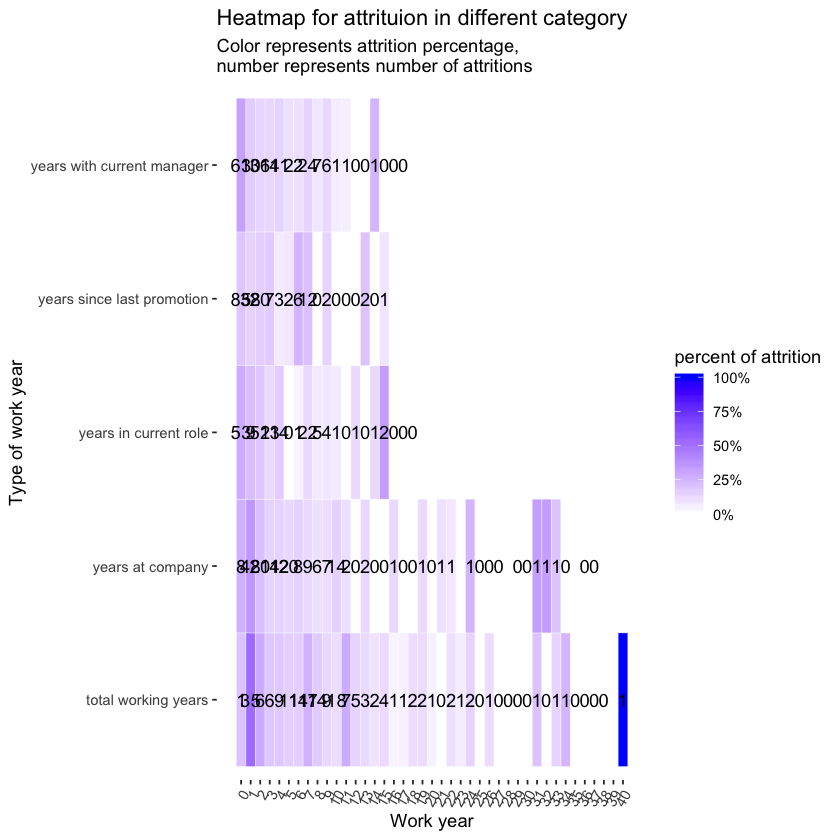

In [15]:
library(scales)

ggplot(status, aes(year, type)) +
  geom_tile(aes(fill=`percent of attrition`), color='white') +
  scale_fill_gradient(low = "white", high = "blue") +
  geom_text(aes(label = X1)) +
  xlab('Work year') + ylab('Type of work year') +
  theme(panel.background = element_blank(), 
        axis.text.x = element_text(angle=60, hjust=1)) +
  scale_x_continuous(breaks = seq(0, 40, 1)) + 
  labs(title = 'Heatmap for attrituion in different category',
       subtitle = 'Color represents attrition percentage, \nnumber represents number of attritions') +
  scale_fill_gradient(low = "white", high = "blue",limits=c(0,1), labels = percent)

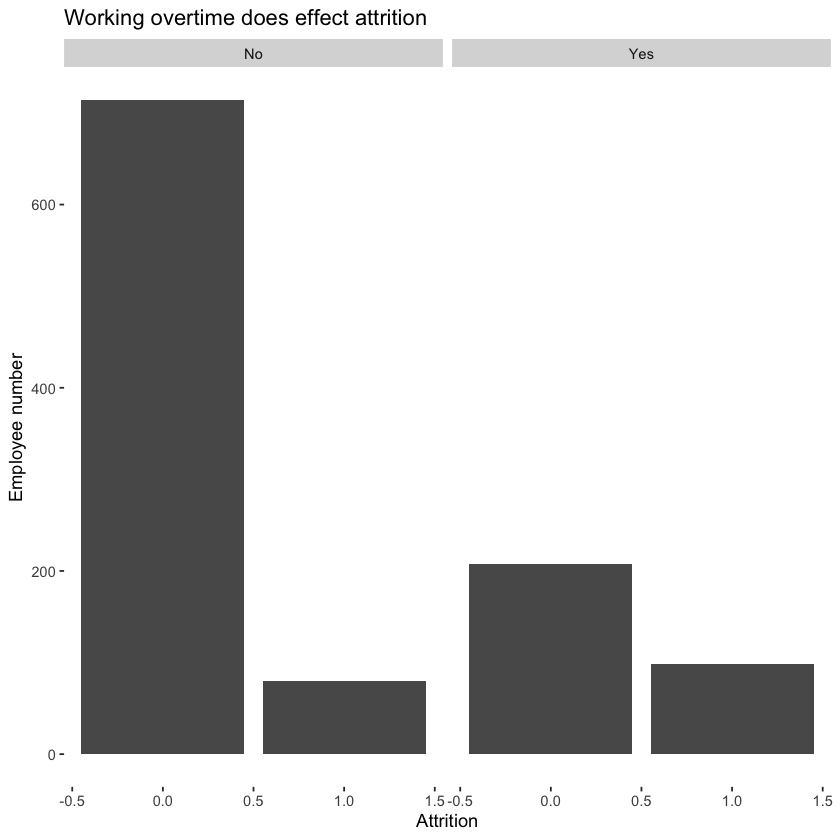

In [16]:
OverTime <- data.frame(unclass(table(train$OverTime, train_num$Attrition)))
OverTime$overtime <- rownames(OverTime)
OverTime <- pivot_longer(OverTime, cols = -overtime) %>%
  transmute(overtime, attrition = case_when(name == 'X0' ~ 0,
                                                name == 'X1' ~ 1), count = value)

ggplot(OverTime, aes(attrition, count)) +
  geom_col() +
  ylab('Employee number') + xlab('Attrition') +
  ggtitle(label = 'Working overtime does effect attrition') +
  theme(panel.background = element_blank()) +
  facet_wrap(. ~ overtime)